In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

team_stats = np.zeros(shape=(14,14))
teams = ["Chennai Super Kings", "Kolkata Knight Riders", "Kings XI Punjab", "Sunrisers Hyderabad",
         "Delhi Capitals", "Rajasthan Royals", "Mumbai Indians", "Royal Challengers Bangalore",
         "Delhi Daredevils", "Deccan Chargers", "Kochi Tuskers Kerala", "Rising Pune Supergiants",
         "Pune Warriors", "Gujarat Lions"]
win_percentages = {}

In [2]:
file = open("IPL Matches 2008-2020.csv", 'r')

for line in file:
    l = line.split(",")
    if l[0] == 'id': continue
        
    team1 = l[-11]
    team2 = l[-10]
    
    if team1 == "Rising Pune Supergiant": team1 += "s"
    if team2 == "Rising Pune Supergiant": team2 += "s"
    if l[-7] == "Rising Pune Supergiant": l[-7] += "s"
    
    ind1 = teams.index(team1)
    ind2 = teams.index(team2)
    
    if team1 == l[-7]: team_stats[ind1][ind2] += 1
    else: team_stats[ind2][ind1] += 1

file.close()

In [3]:
print(team_stats)

[[ 0. 14. 14. 10.  3. 14. 12. 16. 12.  6.  1.  0.  4.  0.]
 [ 8.  0. 18. 12.  1. 12.  6. 14. 13.  7.  0.  3.  4.  1.]
 [ 9.  9.  0.  5.  2.  9. 12. 14. 13.  7.  1.  2.  3.  2.]
 [ 4.  7. 11.  0.  3.  7.  8. 10.  8.  0.  0.  1.  2.  5.]
 [ 2.  3.  2.  3.  0.  4.  1.  4.  0.  0.  0.  0.  0.  0.]
 [ 9. 10. 12.  6.  0.  0. 11. 12. 11.  7.  1.  0.  4.  0.]
 [18. 21. 14.  8.  5. 11.  0. 17. 11.  6.  0.  2.  5.  2.]
 [ 9. 12. 12.  7.  0. 10. 10.  0. 14.  5.  2.  2.  5.  3.]
 [ 6.  8.  9.  4.  0.  7. 11.  7.  0.  7.  1.  2.  3.  3.]
 [ 4.  2.  3.  0.  0.  2.  4.  6.  4.  0.  1.  0.  3.  0.]
 [ 1.  2.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  0.  0.  4.  2.  2.  0.  0.  0.  0.  1.]
 [ 2.  1.  3.  0.  0.  1.  1.  0.  3.  1.  1.  0.  0.  0.]
 [ 0.  3.  2.  0.  0.  0.  2.  2.  1.  0.  0.  3.  0.  0.]]


In [4]:
for ind, team in enumerate(teams): win_percentages[team] = 100*((np.sum(team_stats[ind, :]))/(np.sum(team_stats[ind, :]) + np.sum(team_stats[:, ind])))
for t in sorted(win_percentages, key = win_percentages.get, reverse = True): print(t + ": ", win_percentages[t])

Chennai Super Kings:  59.55056179775281
Mumbai Indians:  59.11330049261084
Delhi Capitals:  57.57575757575758
Sunrisers Hyderabad:  53.2258064516129
Kolkata Knight Riders:  51.5625
Rajasthan Royals:  51.5527950310559
Rising Pune Supergiants:  50.0
Royal Challengers Bangalore:  46.666666666666664
Kings XI Punjab:  46.31578947368421
Gujarat Lions:  43.333333333333336
Kochi Tuskers Kerala:  42.857142857142854
Delhi Daredevils:  42.2360248447205
Deccan Chargers:  38.666666666666664
Pune Warriors:  28.26086956521739


In [5]:
def elo_ratings(diff, chance, kfac):
    ratings = {}
    mse = []
    for team in teams: ratings[team] = 50
    
    file = open("IPL Matches 2008-2020.csv", 'r')

    for line in file:
        l = line.split(",")
        if l[0] == 'id': continue

        team1 = l[-11]
        team2 = l[-10]
        
        if team1 == "Rising Pune Supergiant": team1 += "s"
        if team2 == "Rising Pune Supergiant": team2 += "s"
        if l[-7] == "Rising Pune Supergiant": l[-7] += "s"

        prob = 1/(1+pow(chance, (ratings[team2]-ratings[team1])/diff))

        if team1 == l[-7]: error = 1-prob
        else: error = -prob

        ratings[team1] += kfac*error
        ratings[team2] -= kfac*error
        
        mse += [error**2]
    
    file.close()
    
    return [ratings, stats.mean(mse)]

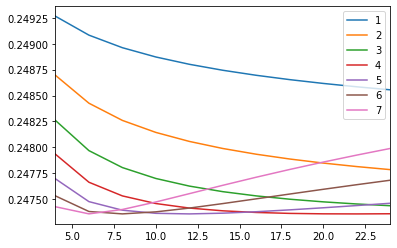

In [6]:
errors = np.zeros(shape=(7, 11))
plt.figure(0)
x = range(4, 25, 2)
for kfac in range(1,8):
    for chance in range(4,25,2):
        errors[kfac-1, int((chance-4)/2)] = elo_ratings(350, chance, kfac)[1]
    plt.plot(x, list(errors[kfac-1, :]))
plt.legend(range(1,8))
plt.xlim(4, 24)
plt.show()

In [7]:
min_chance = 5
min_kfac = 10

final_ratings = elo_ratings(350, min_chance, min_kfac)[0]

for t in sorted(final_ratings, key = final_ratings.get, reverse = True): print(t + ":", final_ratings[t])

Mumbai Indians: 152.96457271927667
Chennai Super Kings: 124.06811494990313
Delhi Capitals: 79.85985933250291
Kolkata Knight Riders: 78.8519408681951
Sunrisers Hyderabad: 77.05666299739187
Rising Pune Supergiants: 57.90781728975783
Rajasthan Royals: 56.8782567150419
Kochi Tuskers Kerala: 40.98611184765481
Gujarat Lions: 30.26559288856383
Royal Challengers Bangalore: 25.771257740716713
Kings XI Punjab: 19.051255097666306
Deccan Chargers: -3.6055897559119554
Delhi Daredevils: -10.987373215969688
Pune Warriors: -29.068479474789328


In [21]:
count = 0
error = 0

for team1 in range(14):
    for team2 in range(team1+1, 14):
        total_matches = team_stats[team1, team2] + team_stats[team2, team1]
        if total_matches <= 5: continue
        prob1 = (team_stats[team1, team2])/(total_matches)
        prob2 = 1/(1+pow(min_chance, (final_ratings[teams[team2]]-final_ratings[teams[team1]])/350))
        print(teams[team1], teams[team2], prob1, prob2)
        error += abs(prob1 - prob2)
        count += 1

print(error/count)

Chennai Super Kings Kolkata Knight Riders 0.6363636363636364 0.5517939864335375
Chennai Super Kings Kings XI Punjab 0.6086956521739131 0.6184345339343408
Chennai Super Kings Sunrisers Hyderabad 0.7142857142857143 0.5538348049302735
Chennai Super Kings Rajasthan Royals 0.6086956521739131 0.5766327175250375
Chennai Super Kings Mumbai Indians 0.4 0.46682946683228194
Chennai Super Kings Royal Challengers Bangalore 0.64 0.6111164721415424
Chennai Super Kings Delhi Daredevils 0.6666666666666666 0.6504546685027585
Chennai Super Kings Deccan Chargers 0.6 0.6426980974265732
Chennai Super Kings Pune Warriors 0.6666666666666666 0.6691144114510349
Kolkata Knight Riders Kings XI Punjab 0.6666666666666666 0.5683168228013924
Kolkata Knight Riders Sunrisers Hyderabad 0.631578947368421 0.5020638370421759
Kolkata Knight Riders Rajasthan Royals 0.5454545454545454 0.5252394440068597
Kolkata Knight Riders Mumbai Indians 0.2222222222222222 0.4156153830118979
Kolkata Knight Riders Royal Challengers Bangalore

In [15]:
diff = 350
chances = 5
kfac = 10

def temporal_plot(t):
    years = []
    team_rating = []
    
    ratings = {}
    
    for team in teams: ratings[team] = 50
    
    file = open("IPL Matches 2008-2020.csv", 'r')

    for line in file:
        l = line.split(",")
        if l[0] == 'id': continue

        team1 = l[-11]
        team2 = l[-10]
        year = l[2][:4]
        
        if team1 == "Rising Pune Supergiant": team1 += "s"
        if team2 == "Rising Pune Supergiant": team2 += "s"
        if l[-7] == "Rising Pune Supergiant": l[-7] += "s"

        prob = 1/(1+pow(chance, (ratings[team2]-ratings[team1])/diff))

        if team1 == l[-7]: error = 1-prob
        else: error = -prob

        ratings[team1] += kfac*error
        ratings[team2] -= kfac*error
        
        if team1 == t:
            years += [year]
            team_rating += [ratings[team1]]
            
        if team2 == t:
            years += [year]
            team_rating += [ratings[team2]]
    
    file.close()
    
    print(years[0], team_rating[0])
    
    for i in range(1, len(years)):
        if years[i] != years[i-1]:
            print(years[i-1], team_rating[i-1])
            print(years[i], team_rating[i])
            
    print(years[len(years)-1], team_rating[len(years)-1])
    
    plt.figure(1)
    plt.plot(years, team_rating)
    plt.show()
    
    return

2008 45.0
2008 25.1180183298495
2009 31.62666108900779
2009 43.96278096040701
2010 38.49734096550465
2010 44.636457194921086
2011 49.75818761916834
2011 65.57234988526287
2012 69.90593439430748
2012 64.20462482339661
2013 69.53383692111596
2013 68.38466166686067
2014 72.11084600415582
2014 48.89481339088147
2015 54.85787773676522
2015 54.74713983760671
2016 59.843667066791554
2016 65.96839552260327
2017 61.299216931260304
2017 32.19357419580206
2018 28.185571235692336
2018 34.82009901320486
2019 31.567503283688282
2019 30.571671186390287
2020 36.416765352840244
2020 39.09546662431263


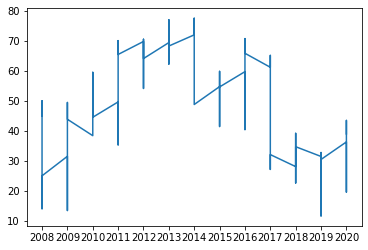

In [16]:
temporal_plot("Royal Challengers Bangalore")